# **Classification of Grapevine Leaves using CNN for Identification Disease on Grapevine Leaves**
Pada program ini mengimplementasikan  arsitektur *machine learning* CNN (*Convolutional Neural Network*) dan transfer learning MobileNetV2 (pre-trained model) untuk melakukan klasifikasi gambar.

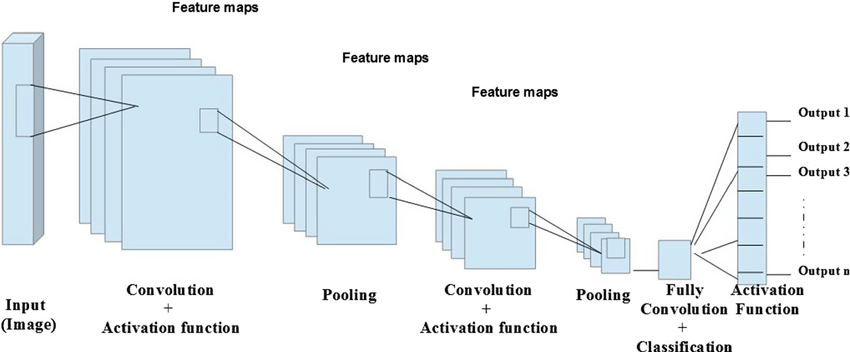

**Import Library**

Mengimport library yang diperlukan termasuk TensorFlow untuk pembelajaran mesin, MobileNetV2 sebagai pre-trained model, layer, dan model dari Keras, optimizer Adam, serta matplotlib dan numpy untuk visualisasi dan manipulasi data.

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

**Path Data dan Batch Size**

Menentukan path data train dan test juga mengatur batch size untuk generator.

In [9]:
# Tentukan path data train dan test
train_data_dir = '/content/drive/MyDrive/Visi Komputer/dataset leaves/train'
test_data_dir = '/content/drive/MyDrive/Visi Komputer/dataset leaves/test'

In [ ]:
# Tentukan batch size dan jumlah epochs
batch_size = 32
epochs = 10

**Data Augmentation**

Membuat generator untuk augmentasi data pada data train menggunakan `ImageDataGenerator`.

In [10]:
# Buat generator untuk augmentasi data pada data train
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Buat generator untuk data test
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

**Data Generator**

Membuat generator dari data train dan test menggunakan `flow_from_directory`. Generator ini menghasilkan batch-batch gambar yang telah di-augmentasi.

In [11]:
# Buat generator dari data train
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 120 images belonging to 2 classes.


In [12]:
# Buat generator dari data test
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 80 images belonging to 2 classes.


**Base Model - MobileNetV2**

Menggunakan MobileNetV2 sebagai based model dimana model ini akan di-load dengan weight yang telah di-train pada dataset ImageNet.

In [13]:
# Gunakan MobileNetV2 sebagai base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 [==============================] - 0s 0us/step


**Model CNN**

Membuat model CNN diatas base model dengan layers `GlobalAveragePooling2D` digunakan untuk meratakan output dari base model kemudian ditambahkan Dense layer dengan fungsi aktivasi ReLU, dropout, dan layer Dense terakhir dengan fungsi aktivasi softmax untuk klasifikasi multi-kelas.

In [14]:
# Buat model CNN di atas base model
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

**Freeze Layer pada Base Model**

Mengatur agar layer pada base model tidak dilatih ulang selama proses training.

In [15]:
# Set agar layer pada base model tidak dilatih kembali
for layer in base_model.layers:
    layer.trainable = False

**Compile Model**

Mengcompile model dengan menggunakan optimizer Adam dan fungsi loss `categorical_crossentropy`.

In [16]:
# Compile model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

**Fungsi untuk Menampilkan Gambar dan Prediksi**

In [17]:
# Fungsi untuk menampilkan contoh gambar dan hasil prediksi
def show_images_with_predictions(generator, model, num_samples=5):
    # Ambil beberapa contoh gambar dari generator
    sample_images, sample_labels = next(generator)

    # Prediksi kelas gambar menggunakan model
    predictions = model.predict(sample_images)

    # Ambil nama kelas (label) dari generator
    class_labels = list(generator.class_indices.keys())

    # Tampilkan gambar dan hasil prediksi
    plt.figure(figsize=(15, 8))
    for i in range(num_samples):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(sample_images[i])
        plt.title(f'True: {class_labels[np.argmax(sample_labels[i])]}')
        plt.axis('off')

        plt.subplot(2, num_samples, i + num_samples + 1)
        plt.bar(range(len(class_labels)), predictions[i])
        plt.xticks(range(len(class_labels)), class_labels, rotation=45)
        plt.title('Predicted')

    plt.show()

**Training Model**

Melakukan proses training model menggunakan data train dan validasi menggunakan data test.

In [18]:
# Latih model
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/10
4/4 [==============================] - 204s 60s/step - loss: 0.8888 - accuracy: 0.6917 - val_loss: 0.3999 - val_accuracy: 0.9500
Epoch 2/10
4/4 [==============================] - 93s 26s/step - loss: 0.3747 - accuracy: 0.9500 - val_loss: 0.3978 - val_accuracy: 0.9625
Epoch 3/10
4/4 [==============================] - 98s 29s/step - loss: 0.3688 - accuracy: 0.9333 - val_loss: 0.2844 - val_accuracy: 0.9625
Epoch 4/10
4/4 [==============================] - 97s 27s/step - loss: 0.2357 - accuracy: 0.9917 - val_loss: 0.3226 - val_accuracy: 0.9625
Epoch 5/10
4/4 [==============================] - 87s 25s/step - loss: 0.2502 - accuracy: 0.9750 - val_loss: 0.3112 - val_accuracy: 0.9625
Epoch 6/10
4/4 [==============================] - 91s 26s/step - loss: 0.2078 - accuracy: 0.9833 - val_loss: 0.2660 - val_accuracy: 0.9625
Epoch 7/10
4/4 [==============================] - 106s 31s/step - loss: 0.1841 - accuracy: 1.0000 - val_loss: 0.2607 - val_accuracy: 0.9625
Epoch 8/10
4/4 [=========

**Evaluasi Model**

Mengevaluasi model pada data test dan menampilkan akurasi hasil evaluasi.

In [19]:
# Evaluasi model
accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy[1]*100:.2f}%')

3/3 [==============================] - 36s 11s/step - loss: 0.2434 - accuracy: 0.9625
Test Accuracy: 96.25%


**Tampilan Gambar dan Hasil Prediksi**

1/1 [==============================] - 2s 2s/step


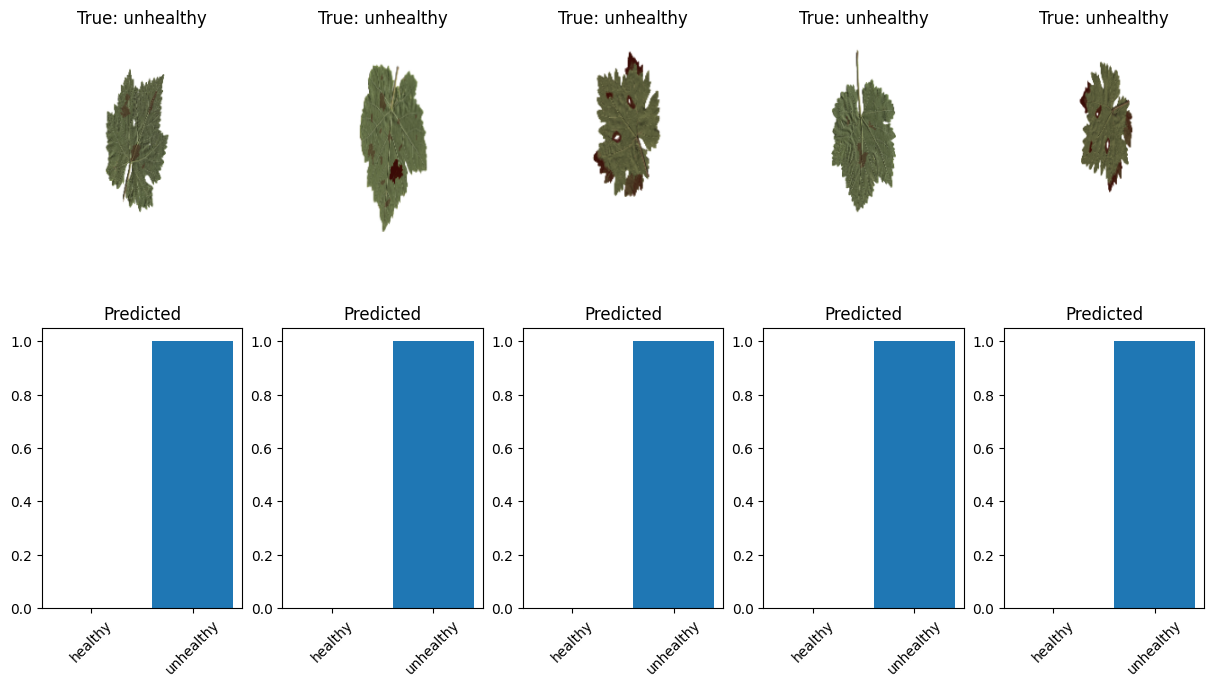

In [20]:
# Tampilkan contoh gambar dan hasil prediksi dari data training
show_images_with_predictions(train_generator, model)

1/1 [==============================] - 1s 1s/step


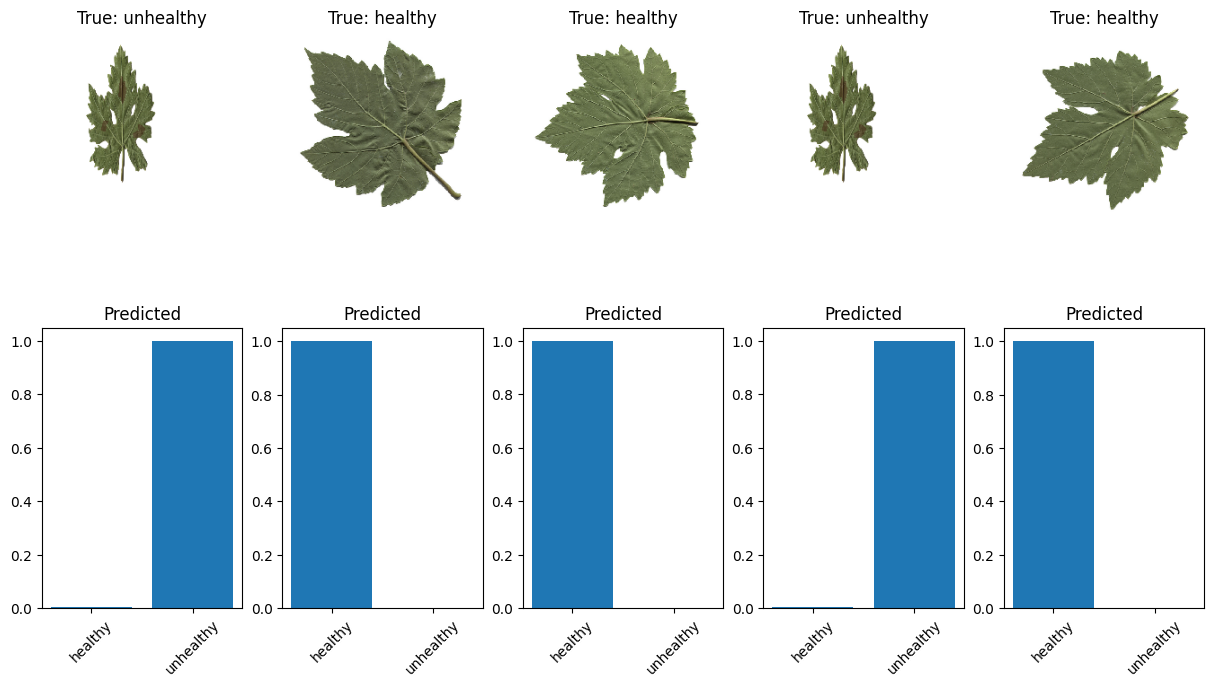

In [21]:
# Tampilkan contoh gambar dan hasil prediksi dari data test
show_images_with_predictions(test_generator, model)